In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('BancoDeDados.csv')
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [4]:
def plot_percentual(x, df):
    plt.figure(figsize=(20, 8))

    img = sns.countplot(x=x, data=df, orient='h')
    img.set_ylabel('Contagem', fontsize=17)
    
    sizes = []

    for bar in img.patches:
        height = bar.get_height()
        sizes.append(height)
        img.text(bar.get_x() + bar.get_width() / 1.6, height + 200, '{:1.2f}%'.format(height / 116581 * 100),
                 ha='center', va='bottom', fontsize=12)
        
    img.set_ylim(0, max(sizes) * 1.1)

    return img

<Axes: xlabel='estado_cliente', ylabel='Contagem'>

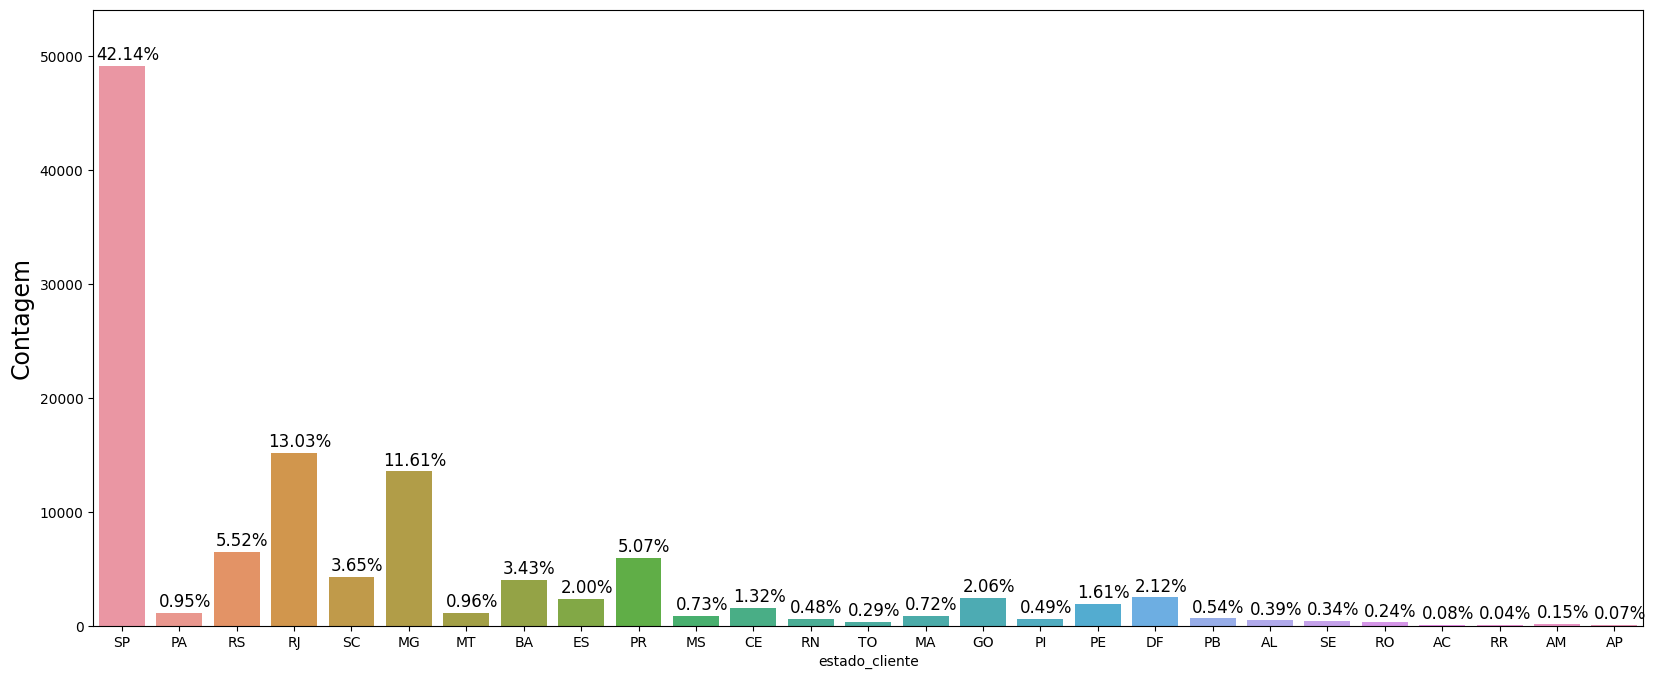

In [5]:
plot_percentual('estado_cliente', df)

<Axes: xlabel='estado_vendedor', ylabel='Contagem'>

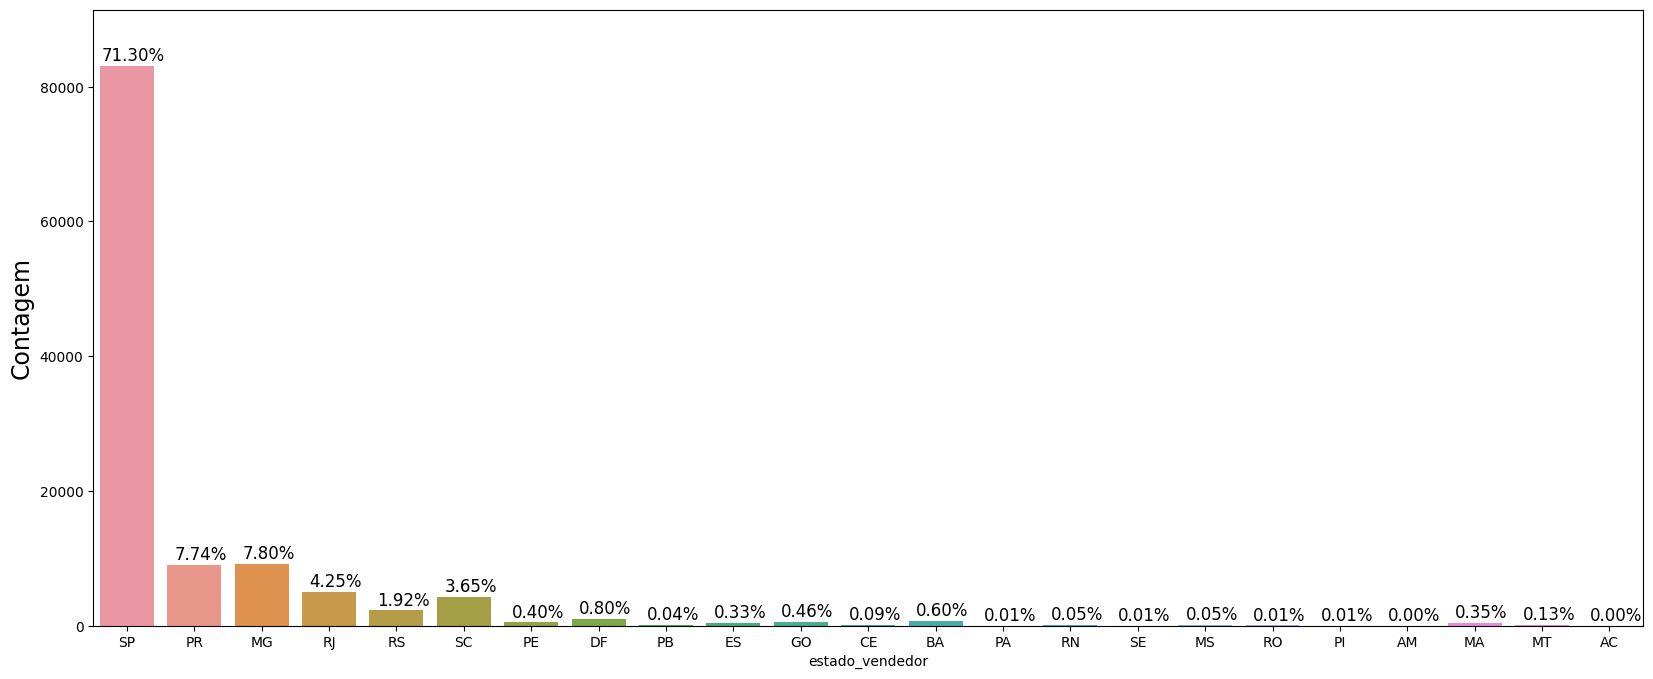

In [6]:
plot_percentual('estado_vendedor', df)

<Axes: xlabel='pagamento_tipo', ylabel='Contagem'>

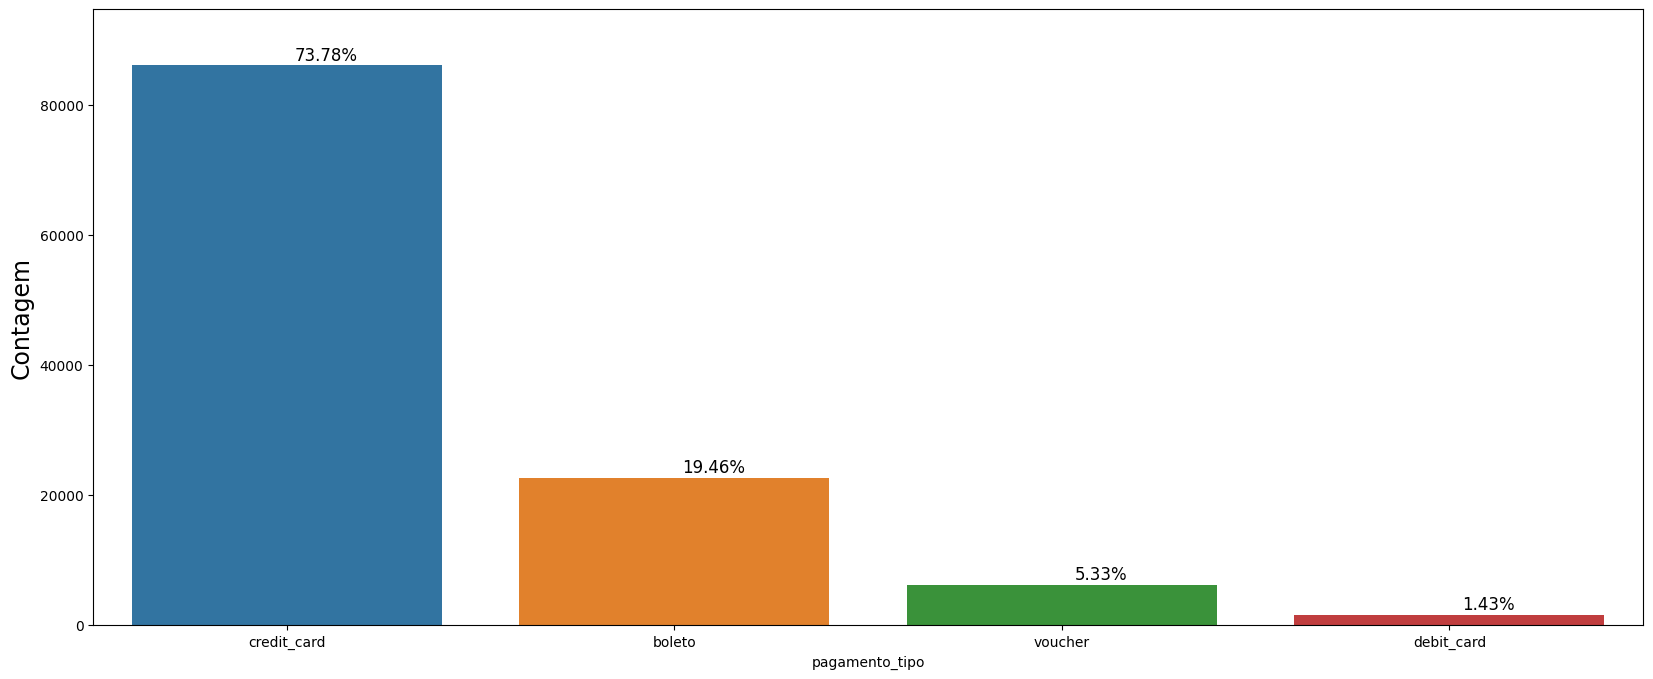

In [7]:
plot_percentual('pagamento_tipo', df)

# RFM:
* Recência
* Frequência
* Monetaridade

In [8]:
df_rfm = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]
df_rfm.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [9]:
df_compras = df_rfm.groupby(['id_unico_cliente'])['horario_pedido'].max().reset_index()
df_compras.head()

,id_unico_cliente,horario_pedido
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [10]:
df_compras['horario_pedido'] = pd.to_datetime(df_compras['horario_pedido'])
df_compras.head()

,id_unico_cliente,horario_pedido
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [11]:
df_compras['recencia'] = (df_compras['horario_pedido'].max() - df_compras['horario_pedido']).dt.days
df_compras.head() 

,id_unico_cliente,horario_pedido,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [12]:
df_usuario = pd.merge(df_rfm, df_compras[['id_unico_cliente', 'recencia']], on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [13]:
from sklearn.cluster import KMeans

In [14]:
def calcular_wcss(df, min_n_clusters, max_n_clusters):
    wcss = []

    for k in range(min_n_clusters, max_n_clusters):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=df)
        df['clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)

    return wcss

In [15]:
df_recencia = df_usuario[['recencia']]
df_recencia.head()

,recencia
0,474
1,298
2,298
3,483
4,211


In [16]:
min_n_clusters = 1
max_n_clusters = 10

soma_quadrados = calcular_wcss(df_recencia, min_n_clusters, max_n_clusters)
soma_quadrados

c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Predify\AppData\Local\Temp\ipykernel_13024\2585819890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.labels_
c:\Users\Predify\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init

[2733029504.943304,
 807902990.283308,
 362025708.89488566,
 213840197.3680914,
 135874154.08586535,
 96317890.37796877,
 69821578.62009093,
 55602785.858137384,
 44156136.239921324]

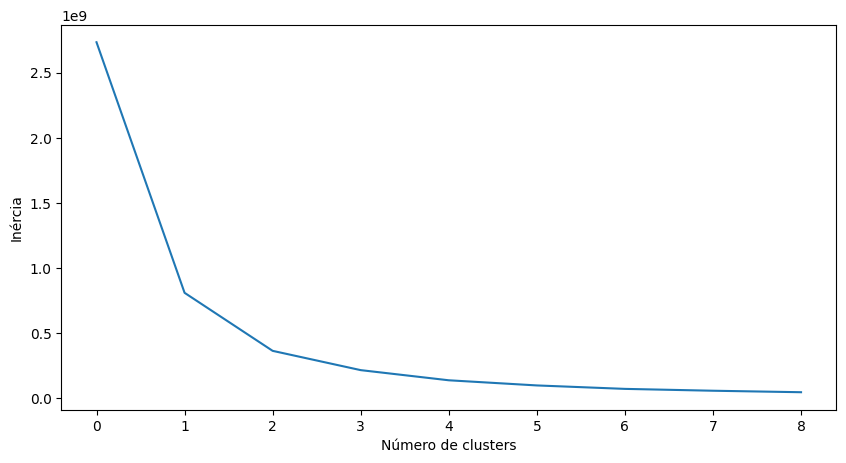

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.show()

Cenário ideal: menor inércia possível para um número razoável de clusters

Melhor número de clusters: representado pelo ponto mais afastado da reta formada entre o primeiro e o último conjuntos

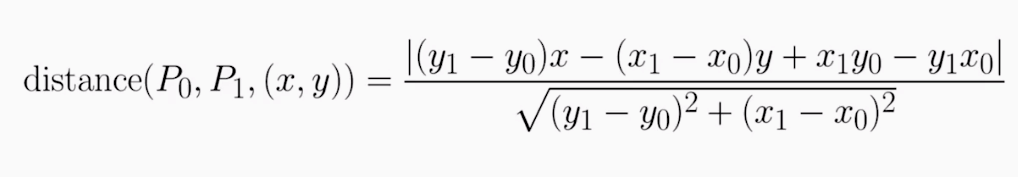

P0: primeiro conjunto
P1: último conjunto
(x, y): coordenadas de um ponto qualquer

In [18]:
def numero_otimo_clusters(wcss, min_n_clusters):
    x1, y1 = 2, wcss[0]
    x2, y2 = 10, wcss[len(wcss) - 1]

    distances = []

    for i in range(len(wcss)):
        x0, y0 = i + min_n_clusters, wcss[i]

        distance = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1) ** 0.5 + (x2 - x1) ** 0.5)
        distances.append(distance)

    return distances.index(max(distances)) + min_n_clusters

In [19]:
n_clusters = numero_otimo_clusters(soma_quadrados, min_n_clusters)
n_clusters

3